# 鸢尾花数据分析

此项目中将通过：
- Sepal Length
- Sepal Width
- Petal Length
- Petal Width

这四个维度来实现对鸢尾花的分类，种类(label)有：
- Setosa
- Versiclolor
- Virginica

数据集试例：
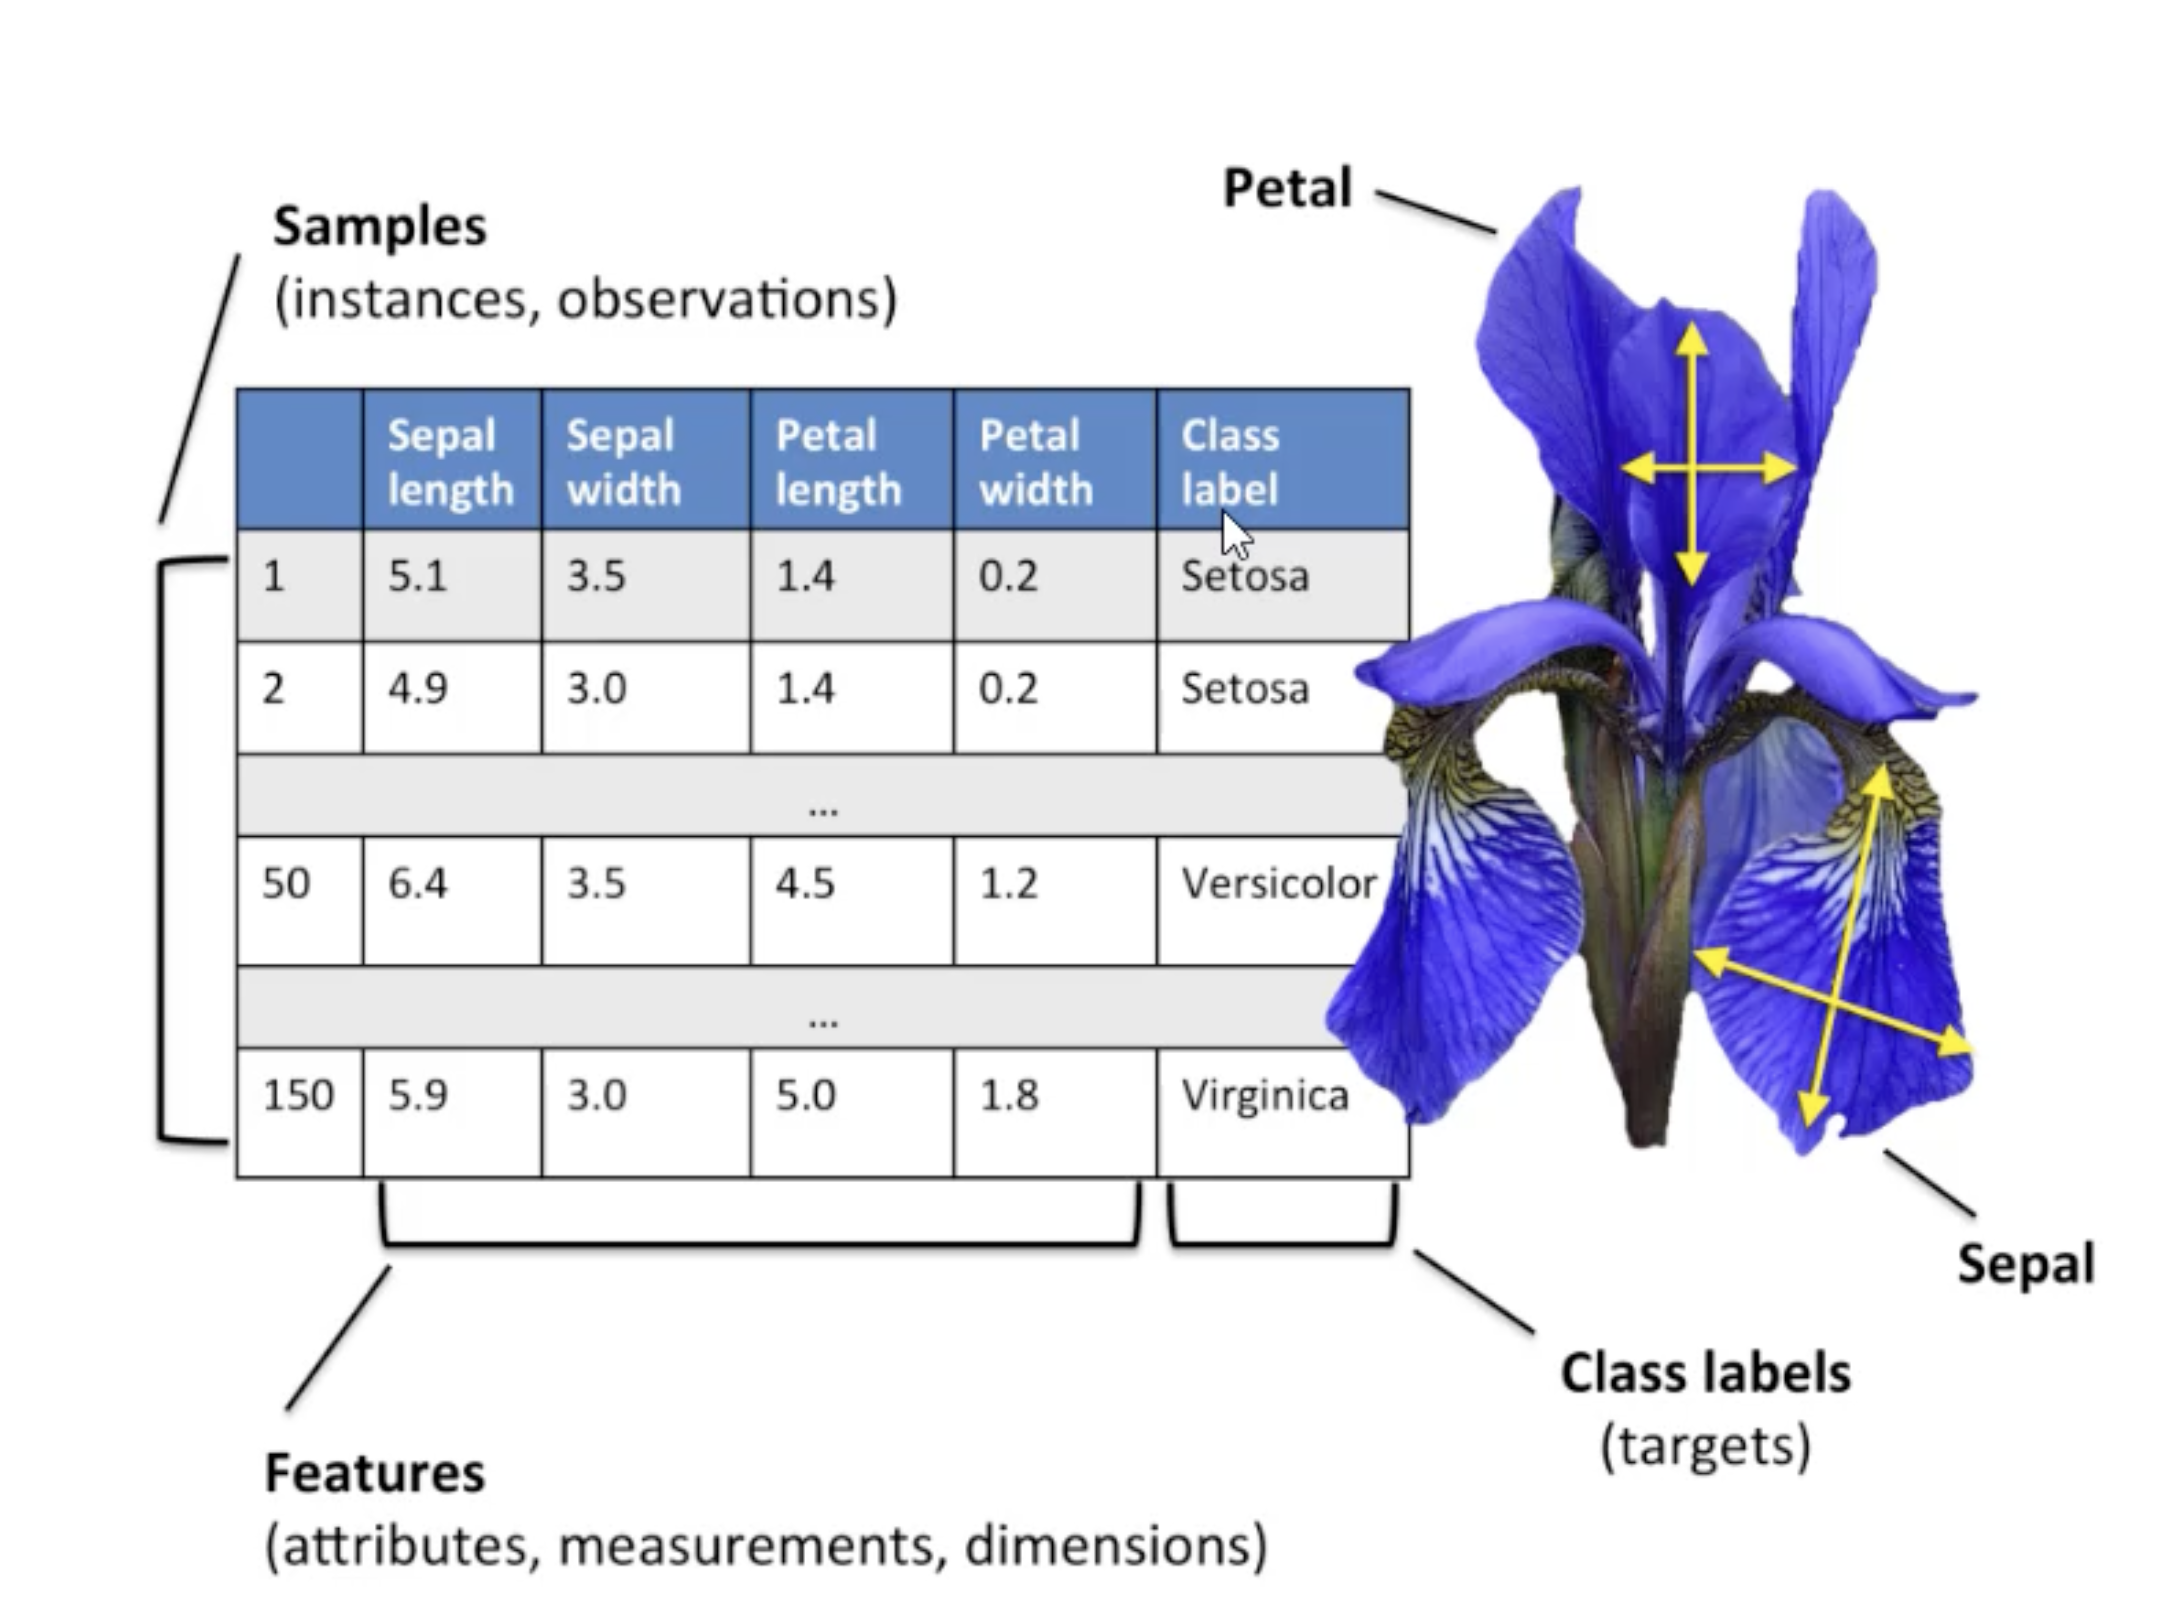

## 观察数据集
我们需要对数据集的分配结构有一个基本了解，才可以进行分析和可视化的工作。

In [12]:
# 我们需要的数据集已被Build-in在sklearn的包中
from sklearn import datasets
iris = datasets.load_iris()

# 打印iris数据集的各项内容
print('以下是数据集的key，也就是数据集的组成元素有哪些')
print(iris.keys())

print('\n以下是数据集的target，也就是label') #注意这个不是函数，所以target后面不加括号
print(iris.target) # 设计此数据集时，并没有把label作为其名称的string来储存，而是使用的0、1、2这样的integer来表示

print('\n以下是数据集的feature_names，也就是feature分别是什么') #注意这个不是函数，所以target后面不加括号
print(iris.feature_names)

print('\n数据集的维度是')
print(iris.data.shape)

print('\n数据集的data内容是')
print(iris.data)

以下是数据集的key，也就是数据集的组成元素有哪些
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

以下是数据集的target，也就是label
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

以下是数据集的feature_names，也就是feature分别是什么
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

数据集的维度是
(150, 4)

数据集的data内容是
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.

## 可视化数据集
虽然我们有四种feature可以作为分类的权重，但由于我们无法对四维的坐标系进行可视化，在这里我们先从二维来着手。

### 二维可视化

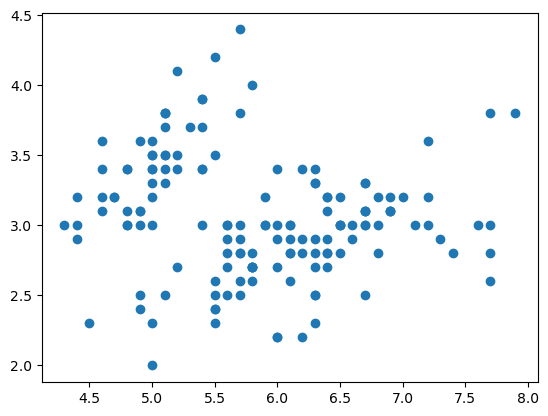

In [13]:
import matplotlib.pyplot as plt
X = iris.data[:,0:2] # 第一个冒号代表取全部150行，0：2代表取data中的前两列
# 由此X被赋值成了一个 2列150行 的表格（数据集）

plt.scatter(X[:,0],X[:,1]) # 将X的第一行和第二行作为横纵坐绘图
plt.show()

这样我们就用一个二维的坐标系，把这150个鸢尾花的sepal length 和 sepal width表示了出来。

但是问题在于，我们将所有150个对象都以一种颜色来表现，这样是我们无法分类，因此接下来要给这些点分配不同的颜色。

### 二维可视化：加上颜色区分
思路：同时考虑数据集中的target条目，并按行行对应来实现颜色区分。


X中被标记为0的行的维度是：  (50, 2)


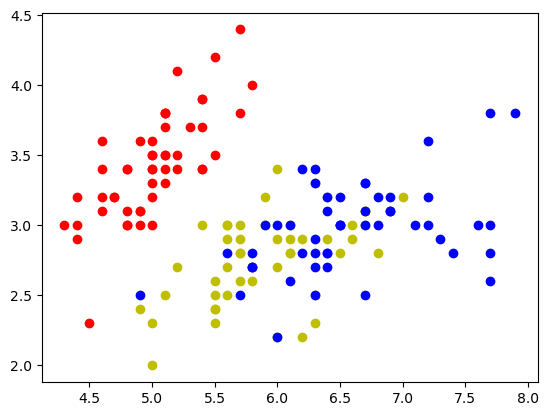

In [14]:
# 第一步：逐行判断每行所描述的是那种鸢尾花

y = iris.target # 将y作为仅收集数据集中，target栏目的数组


print('X中被标记为0的行的维度是： ',X[y==0].shape) # 数组X中被标记为0的行，所占的维度

# 分配X中分别被标记为0，1，2的三种花,由此原始数据集X被我们分成了三份
tag0 = X[y==0]
tag1 = X[y==1]
tag2 = X[y==2]

#绘图
plt.scatter(tag0[:,0],tag0[:,1],color = 'r')
plt.scatter(tag1[:,0],tag1[:,1],color = 'y')
plt.scatter(tag2[:,0],tag2[:,1],color = 'b')
plt.show()


由此我们实现了三种鸢尾花，在sepal（花萼）的长和宽这两种维度下的可视化。

问题：有图中可见蓝色和黄色很难进行分类，在不提升维度的前提下，我们应当更换feature来分类。

### 使用花瓣长宽来分类

X中被标记为0的行的维度是：  (50, 2)


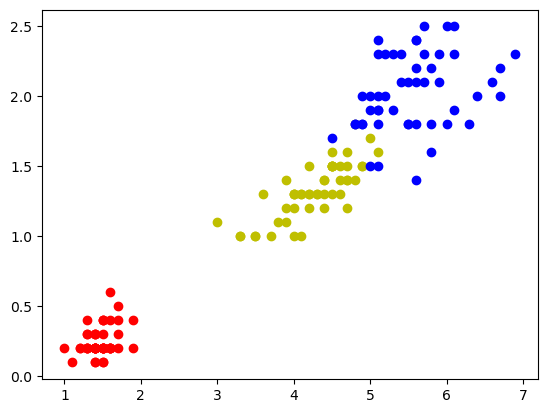

In [17]:
X = iris.data[:,2:4] 
# 由此X被赋值成了一个 2列150行 的表格（数据集）

y = iris.target # 将y作为仅收集数据集中，target栏目的数组


print('X中被标记为0的行的维度是： ',X[y==0].shape) # 数组X中被标记为0的行，所占的维度

# 分配X中分别被标记为0，1，2的三种花,由此原始数据集X被我们分成了三份
tag0 = X[y==0]
tag1 = X[y==1]
tag2 = X[y==2]

#绘图
plt.scatter(tag0[:,0],tag0[:,1],color = 'r')
plt.scatter(tag1[:,0],tag1[:,1],color = 'y')
plt.scatter(tag2[:,0],tag2[:,1],color = 'b')
plt.show()

在这样的二维坐标系中，点分布得更加离散，更方便线性分类。